In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [21]:
font = {'family' : 'sans-serif',
        'style' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.rcParams['axes.grid']=True
plt.rcParams["figure.figsize"] = (17,6)

# Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [22]:
logins = pd.read_json('logins.json', convert_dates=True, )
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [23]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [24]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [25]:
datadesc = logins.describe()
print('Observation period: {}'.format(datadesc.values[-1]-datadesc.values[-2]))

Observation period: [Timedelta('101 days 22:45:22')]


In [26]:
print(logins.dtypes)

login_time    datetime64[ns]
dtype: object


In [27]:
#creating login counts column in preparation for resampling
logins['login_counts'] = 1
logins.set_index('login_time', inplace = True)
logins.head()

,login_counts
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [28]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
login_counts    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [29]:
#resampling for every 15 minutes
fifteen_login = logins.resample('15MIN', label = 'right').sum()
fifteen_login.head()

,login_counts
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [30]:
fifteen_login.describe()

,login_counts
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


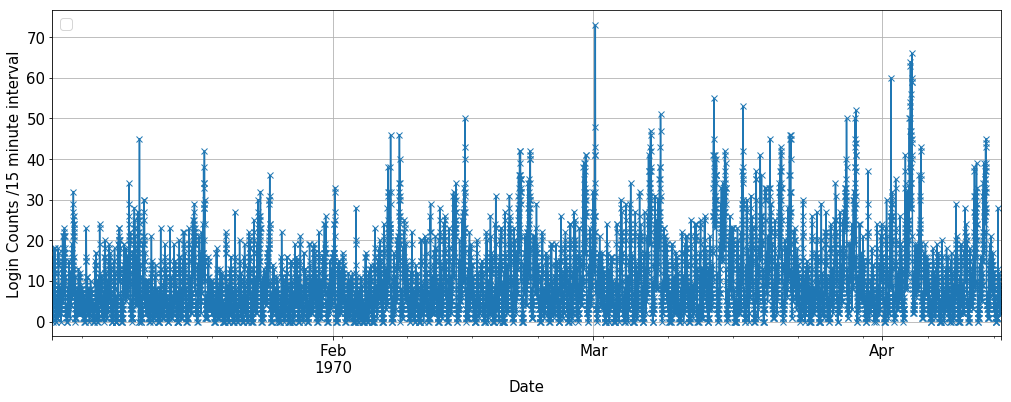

In [11]:
fifteen_login.plot(marker = 'x',linestyle = 'solid');
plt.xlabel('Date')
plt.ylabel('Login Counts /15 minute interval')
plt.legend([], loc = 'upper left')
plt.show()

 The login counts don't show an obvious pattern. Above we can see the highest number of login counts (over 70) occurred around the beginning of March, followed by the first half of April. More context is provided below.

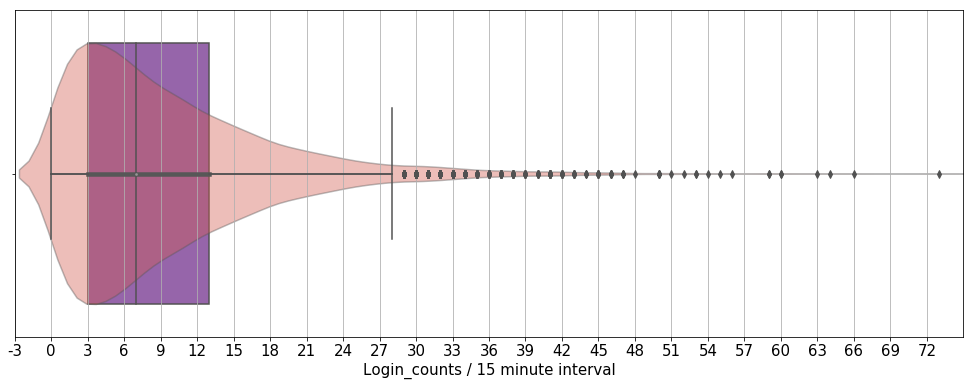

In [12]:
fig,ax1 = plt.subplots(1,1, sharex = True)

sns.violinplot(fifteen_login, color = "#e74c3c", alpha = 0.2, ax = ax1)
sns.boxplot(fifteen_login, color = "#9b59b6", ax = ax1)
ax1.set(xticks = np.arange(-3,75, 3),
       xticklabels=np.arange(-3,75,3),
       xlim = [-3,75],
       xlabel ='Login_counts / 15 minute interval')
plt.setp(ax1.collections, alpha=.4) 

plt.subplots_adjust(hspace=0.01)
plt.show()

The median amount of login counts is 7 while the maximum amount of counts is 73 logins per 15 minute interval. The most common login count is 3 per 15 minute interval. 

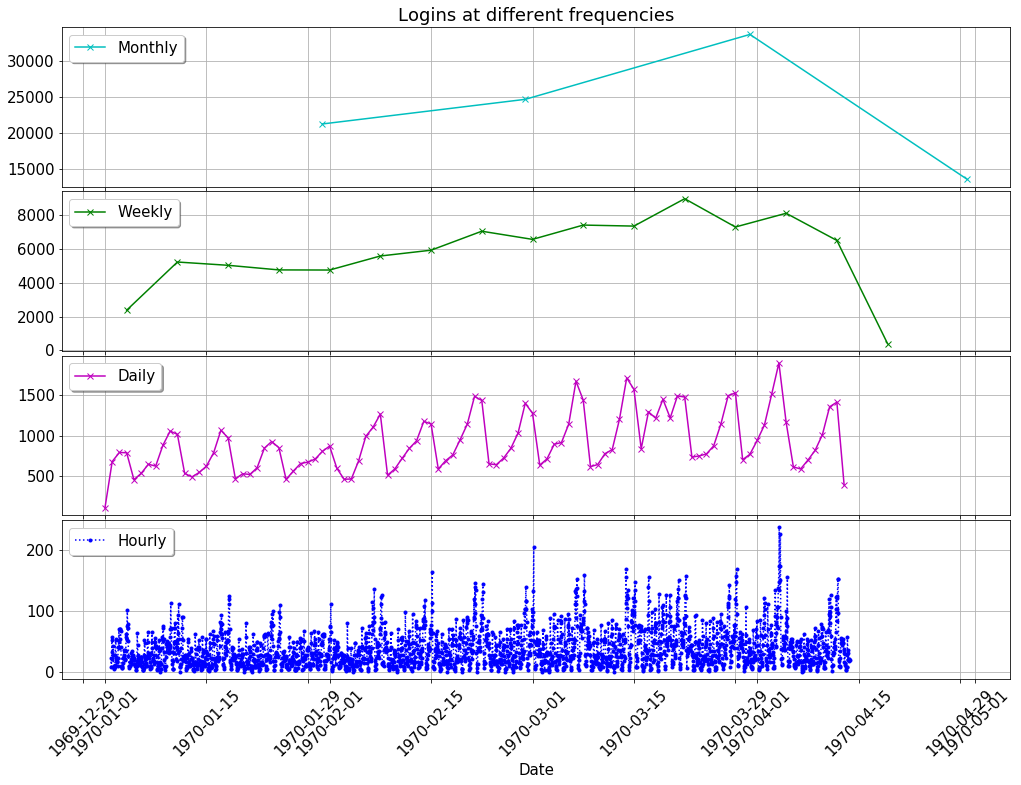

In [13]:
logins_h = logins.resample('H').sum() 
logins_d = logins.resample('D').sum() 
logins_w = logins.resample('W').sum() 
logins_m = logins.resample('M').sum() 

fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (17,12),sharex = True)

ax1.set_title('Logins at different frequencies')


ax1.plot(logins_m, marker = 'x', color = 'c', label = 'Monthly')
ax1.legend(shadow=True, fancybox=True, loc = 'upper left')
ax2.plot(logins_w, marker = 'x', color = 'g', label = 'Weekly')
ax2.legend(shadow=True, fancybox=True, loc = 'upper left')
ax3.plot(logins_d, marker = 'x', color = 'm', label = 'Daily')
ax3.legend(shadow=True, fancybox=True, loc = 'upper left')
ax4.plot(logins_h, marker = '.', linestyle = ":",color = 'b', label = 'Hourly')
ax4.legend(shadow=True, fancybox=True, loc = 'upper left')


plt.xticks(rotation = '45')
ax4.set_xlabel('Date')
plt.subplots_adjust(hspace=0.03)

plt.show()

The montly plot shows an increase in the login counts from January until April however the rest of April is extrapolated since data was only captured during the first half of April. 

This was mirrored in the weekly login data where logins progressively increased over the corresponding time period. The login counts ofver the last week are also extrapolated since the last date measured was 4/13/1970.

The daily frequencies show some seasonality after around six days. It is worth exploring to see whether this trend can be visualized more clearly

In [14]:
logins_d['login_day'] = logins_d.index.weekday
logins_d['login_month']= [calendar.month_name[i] for i in logins_d.index.month]
logins_d.head()

,login_counts,login_day,login_month
login_time,,,
1970-01-01,112,3,January
1970-01-02,681,4,January
1970-01-03,793,5,January
1970-01-04,788,6,January
1970-01-05,459,0,January


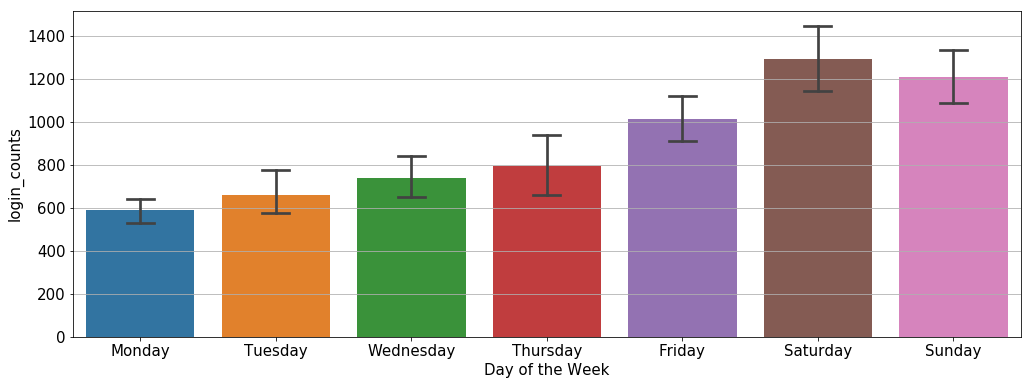

In [15]:
sns.barplot(x='login_day', y='login_counts', data=logins_d, capsize = 0.2, orient = 'v')
plt.xticks(np.arange(0,7),list(calendar.day_name));
plt.xlabel('Day of the Week')
plt.show()

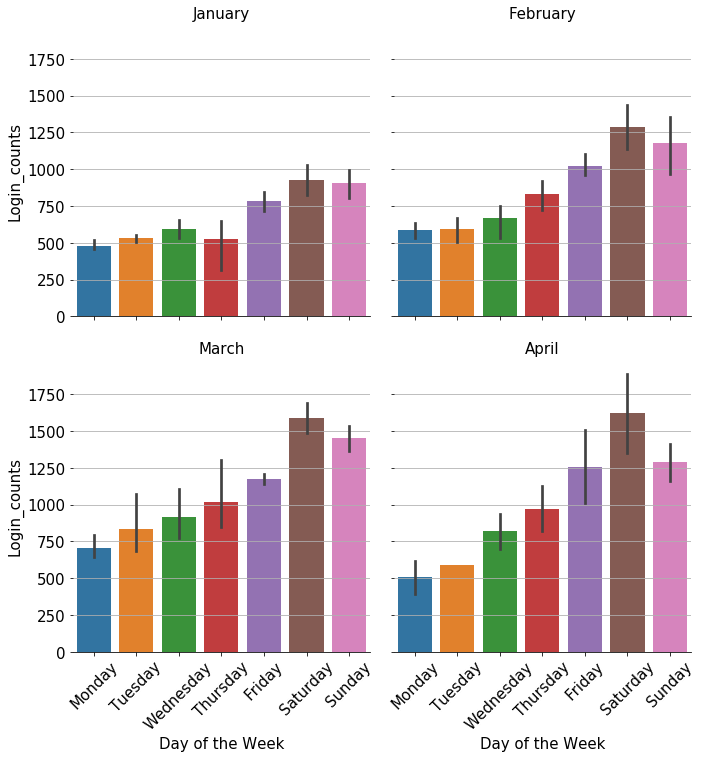

In [16]:
g = sns.catplot(x = 'login_day', y = 'login_counts', col = 'login_month',col_wrap = 2, data = logins_d, kind = 'bar')
(g.set_axis_labels("Day of the Week","Login_counts")
.set_xticklabels(list(calendar.day_name), rotation = '45')
.set_titles("{col_name}")
.despine(left=True))  ;

The data clearly shows a higher amount of logins on weekends (Saturday in particular) across the whole time period. This is intuitive as weekdays are used by most people for leisure so they might use their free time to log in to the service.

In [17]:
logins_h['login_hour'] = logins_h.index.hour
logins_h.head()

,login_counts,login_hour
login_time,,
1970-01-01 20:00:00,24,20
1970-01-01 21:00:00,9,21
1970-01-01 22:00:00,21,22
1970-01-01 23:00:00,58,23
1970-01-02 00:00:00,53,0


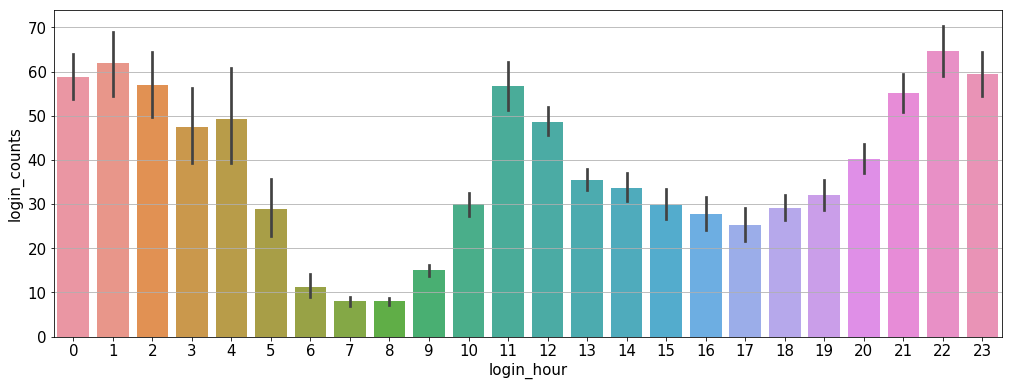

In [19]:
sns.barplot(logins_h.login_hour,logins_h.login_counts);

The login counts seem to vary over a 24 hour period with most logins occurring late at night between 10pm and 2am. This is intuitive as this is a time when most users would be winding down their day or perhaps unproductively easing their insomnia by loging in. The trend dies down markedly between the hours of 6am and 9am perhaps corresponding with people's commutes. 